In [2]:
%matplotlib inline
%config InlineBackend.figure_format ='svg'

from sys import path
path.append("../../shared_python_scripts/")

import numpy as np
import matplotlib.pyplot as plt

from BrushDensityParser import BrushDensityParser

directory = '/home/lars2/Nextcloud/Eos/Data/School/CE/Masteropdracht/MD SPiVHB/2019-06-26 4x4_grid/'
bdp = BrushDensityParser()

def plotProfiles(subdir, ax):
	poly = bdp.loadDensity(directory + subdir + '/PolyDens.dat')
	solvent = bdp.loadDensity(directory + subdir + '/SolvDens.dat')
	
	# time-averaged profile
	poly_ta = np.mean(poly, axis=0)
	solvent_ta = np.mean(solvent, axis=0)
	
	ax.plot(poly_ta[ :, 1], poly_ta[:, 2])
	ax.plot(solvent_ta[ :, 1], solvent_ta[:, 2])
	
	ax.set_title(subdir)


Density profiles plotted for initial 4x4 grid sampling for low grafting density brush system.



Text(0.04, 0.5, '$\\epsilon_{ps}$')

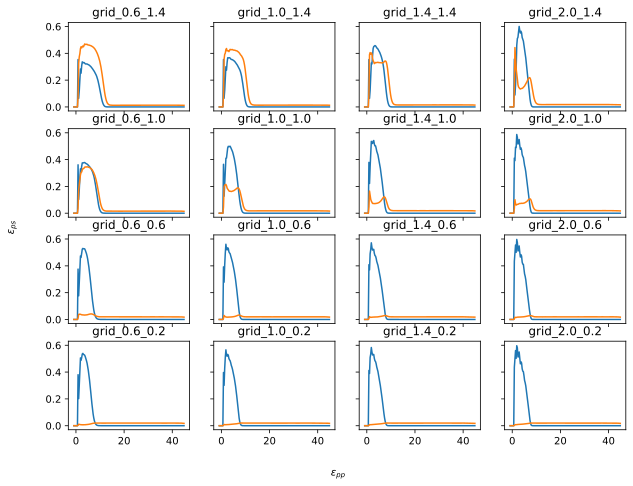

In [3]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(10, 7.5), dpi=200)

#                  epp eps      y  x
plotProfiles('grid_0.6_0.2', ax[3, 0])
plotProfiles('grid_1.0_0.2', ax[3, 1])
plotProfiles('grid_1.4_0.2', ax[3, 2])
plotProfiles('grid_2.0_0.2', ax[3, 3])

plotProfiles('grid_0.6_0.6', ax[2, 0])
plotProfiles('grid_1.0_0.6', ax[2, 1])
plotProfiles('grid_1.4_0.6', ax[2, 2])
plotProfiles('grid_2.0_0.6', ax[2, 3])

plotProfiles('grid_0.6_1.0', ax[1, 0])
plotProfiles('grid_1.0_1.0', ax[1, 1])
plotProfiles('grid_1.4_1.0', ax[1, 2])
plotProfiles('grid_2.0_1.0', ax[1, 3])

plotProfiles('grid_0.6_1.4', ax[0, 0])
plotProfiles('grid_1.0_1.4', ax[0, 1])
plotProfiles('grid_1.4_1.4', ax[0, 2])
plotProfiles('grid_2.0_1.4', ax[0, 3])

fig.text(0.5, 0.04, r'$\epsilon_{pp}$', ha='center')
fig.text(0.04, 0.5, r'$\epsilon_{ps}$', va='center', rotation='vertical')


Ratio of coordination numbers solvent-solvent / solvent-polymer for every point


In [4]:
from RegimeClassifier import RegimeClassifier
import pandas as pd

eppList = [0.6, 1.0, 1.4, 2.0]
epsList = [0.2, 0.6, 1.0, 1.4]

rc = RegimeClassifier()

dirlist = [['grid_{}_{}'.format(epp, eps) for epp in eppList] for eps in epsList[::-1]]
print(pd.DataFrame(dirlist))

              0             1             2             3
0  grid_0.6_1.4  grid_1.0_1.4  grid_1.4_1.4  grid_2.0_1.4
1  grid_0.6_1.0  grid_1.0_1.0  grid_1.4_1.0  grid_2.0_1.0
2  grid_0.6_0.6  grid_1.0_0.6  grid_1.4_0.6  grid_2.0_0.6
3  grid_0.6_0.2  grid_1.0_0.2  grid_1.4_0.2  grid_2.0_0.2


          0         1         2         3
0  1.858031  1.613485  1.230266  1.156798
1  1.153657  0.660014  0.685410  0.782334
2  0.345199  0.717329  0.873987  0.957846
3  1.754631  2.540083  2.716777  2.816746


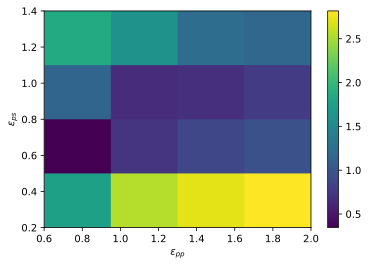

In [14]:

ratios = [[rc.get_ratio(directory + point + '/rdf.dat') for point in row] for row in dirlist]

print(pd.DataFrame(ratios))

fig, ax = plt.subplots(dpi=200)
pos = ax.imshow(ratios, extent=[0.6, 2.0, 0.2, 1.4], aspect='auto')
ax.set_xlabel(r'$\epsilon_{pp}$')
ax.set_ylabel(r'$\epsilon_{ps}$')
plt.colorbar(pos)


          0         1         2         3
0  4.356712  4.110646  3.411877  1.754583
1  3.112752  1.773916  0.871431  0.757981
2  0.360085  0.206513  0.193513  0.189045
3  0.090703  0.100611  0.104968  0.107415


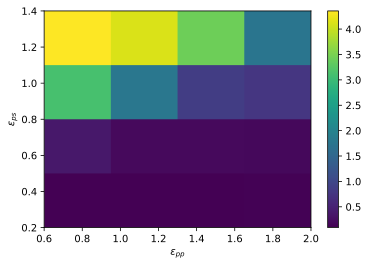

In [15]:

overlap = [[rc.get_overlap(directory + point) for point in row] for row in dirlist]

print(pd.DataFrame(overlap))

fig, ax = plt.subplots(dpi=200)
pos = ax.imshow(overlap, extent=[0.6, 2.0, 0.2, 1.4], aspect='auto')
ax.set_xlabel(r'$\epsilon_{pp}$')
ax.set_ylabel(r'$\epsilon_{ps}$')
plt.colorbar(pos)